In [76]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import numpy as np
from collections import defaultdict
from scipy import stats

cid ="baca9371d5f8409a85ffee343639df22" 
secret = "75d20d82245b445882cafae68e3442aa"

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{Tyler,the Creator}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'},
  'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF',
  'id': '4V8LLVI7PbaPR0K2TGSxFF',
  'name': 'Tyler, The Creator',
  'type': 'artist',
  'uri': 'spotify:artist:4V8LLVI7PbaPR0K2TGSxFF'}]

In [2]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:5zi7WsKlIiUXv09tbGLKsE',
 'spotify:album:2nkto6YNI4rUYTLqEwWJ3o',
 'spotify:album:621OhgnZJ7Pz8iUazct1In',
 'spotify:album:5V3Chnpno9oTI7JSPXKUf3',
 'spotify:album:6hSjwUPL9jSBtZPgyFWfjI',
 'spotify:album:40QTqOBBxCEIQlLNdSjFQB',
 'spotify:album:40ucxnGO51wcTGNI6xge6z',
 'spotify:album:7tjZ51DOxwxIcnY20ThkaV',
 'spotify:album:1YVf1gCvpUKr0YGtgFVmfm',
 'spotify:album:2gZGyIkGCLR5bCBud4ADl9']

In [3]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [4]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album IGOR songs has been added to spotify_albums dictionary
Album Flower Boy songs has been added to spotify_albums dictionary
Album Cherry Bomb songs has been added to spotify_albums dictionary
Album Cherry Bomb + Instrumentals songs has been added to spotify_albums dictionary
Album Live At Splash! songs has been added to spotify_albums dictionary
Album Wolf songs has been added to spotify_albums dictionary
Album Goblin (Deluxe Edition) songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary
Album Goblin songs has been added to spotify_albums dictionary


In [5]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [6]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 29.80193829536438 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 54.74015021324158 seconds


In [7]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

180

In [153]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
#df

In [152]:
#df[df["album"]=="Goblin (Deluxe Edition)"]

In [141]:

# findal_df=df.drop_duplicates('name').sort_index()
dfa = df[df["album"]!="Goblin (Deluxe Edition)"]
dfb = dfa[dfa["album"]!="Cherry Bomb + Instrumentals"]
dfc = dfb[dfb["album"]!="Live At Splash!"].drop_duplicates('name')
final_df = dfc.iloc[0:72,:]

#final_df

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[0.446, 0.738, 0.221, 0.457, 0.197, 0.636, 0.388, 0.496, 0.374, 0.211, 0.428, 0.272, 0.2, 0.519, 0.439, 0.383, 0.661, 0.643, 0.663, 0.597, 0.477, 0.275, 0.535, 0.725, 0.128, 0.274, 0.488, 0.483, 0.375, 0.157, 0.377, 0.967, 0.591, 0.455, 0.12, 0.545, 0.469, 0.191, 0.151, 0.172, 0.343, 0.634, 0.352, 0.554, 0.205, 0.205, 0.113, 0.27, 0.36, 0.62, 0.144, 0.569, 0.148, 0.239, 0.547, 0.297, 0.413, 0.575, 0.371, 0.654, 0.0648, 0.413, 0.431, 0.0, 0.162, 0.464, 0.505, 0.199, 0.449, 0.471, 0.584, 0.313]


Text(0, 0.5, 'Valence Score')

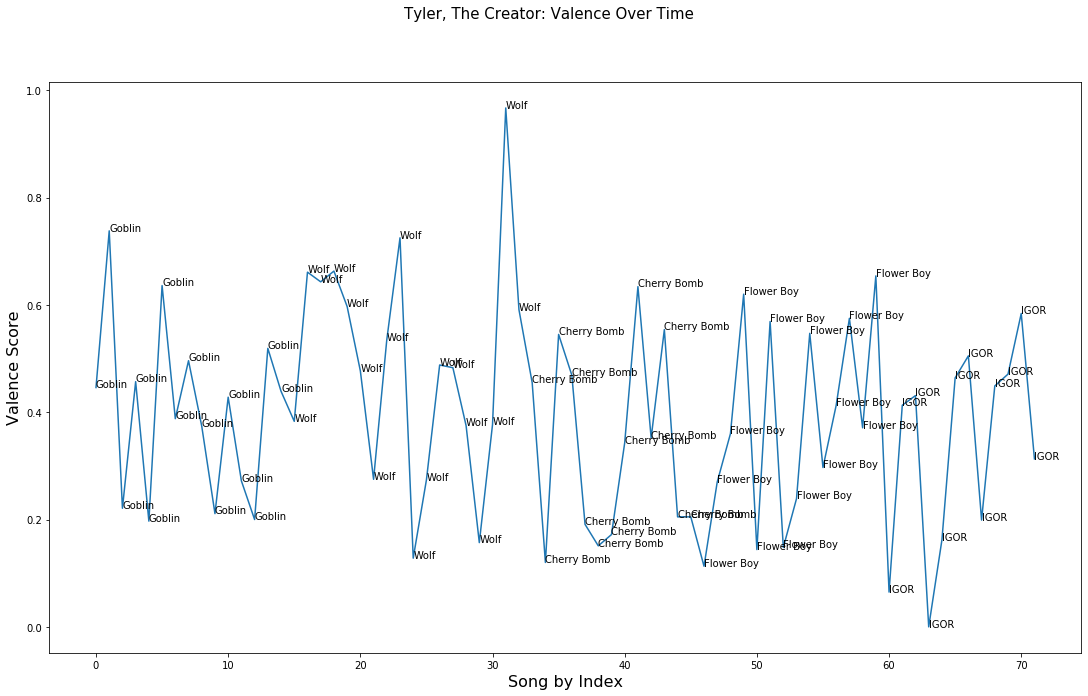

In [149]:
albums = list(pd.unique(final_df["album"]))
albums.reverse()

alb_n = []
v_scores = []

for x in albums:
    for track in final_df[final_df["album"]==x].iterrows():
        alb_n.append(track[1]['album'])
        v_scores.append(track[1]['valence'])

print (v_scores)
fig, ax = pyplot.subplots()
ax.plot(v_scores)

for i in range(len(v_scores)):
    ax.annotate(album[i],(i,v_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.suptitle('Tyler, The Creator: Valence Over Time', fontsize=15)
pyplot.xlabel('Song by Index', fontsize=16)
pyplot.ylabel('Valence Score', fontsize=16)

Text(0, 0.5, 'Valence Scores')

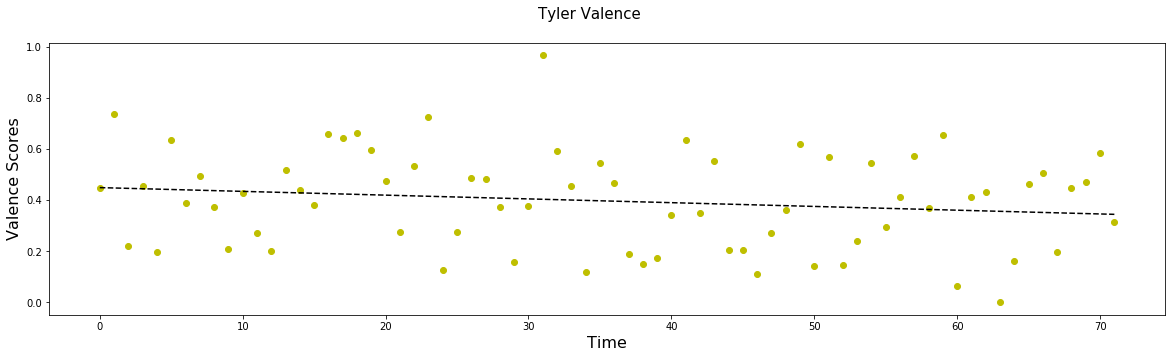

In [150]:
x = range(0,len(v_scores))

pyplot.figure(figsize=(20, 5))

coef = np.polyfit(x,v_scores,deg=1)
poly1d_fn = np.poly1d(coef) 

pyplot.plot(x,v_scores, 'yo', x, poly1d_fn(x), '--k')

fig = pyplot.gcf()

fig.suptitle('Tyler Valence', fontsize=15)
pyplot.xlabel('Time', fontsize=16)
pyplot.ylabel('Valence Scores', fontsize=16)

In [151]:
stat_lst = []
stat_lst = [slope, intercept, r_value, p_value, std_err] = stats.linregress(x, v_scores)
r_sq = stat_lst[2]**2
print(r_sq)

stat_lst

0.026044772370267595


LinregressResult(slope=-0.001473001479194803, intercept=0.44941377473363775, rvalue=-0.16138392847575497, pvalue=0.1756349070194018, stderr=0.001076622313194943)